# In-class Assignment 3 - Classification Problem <Hr>

## Submitted by: Aarjeyan Shrestha C0927422 <hr>

### About Dataset
##### Context
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

Number of Instances: 740 

Number of Attributes: 21

Missing Values: 0

Dataset :[https://archive.ics.uci.edu/dataset/445/absenteeism+at+work](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

## Features in the Dataset (Columns)
1. Individual identification (ID)
2. Reason for absence (ICD). (Target Column) [https://icd.who.int/browse10/2016/en](https://icd.who.int/browse10/2016/en)
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours


## 1. Importing Libraries

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

In [2]:
# importing the dataset
df = pd.read_csv("Absenteeism_at_work.csv",delimiter=";")

## 3. Data Preparation

#### 3.1. Checking Missing Values

In [3]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

#### 3.2 Outlier using IQR and replacing it with mean

In [4]:
# defining categorical attributes
categorical_atts = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
#defining the numerical  attributes 
numerical_atts = df.drop(columns=categorical_atts).columns.to_list()

In [5]:
# Handling Outliers 
for num_att in numerical_atts:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(df[num_att], [75,25])
    MEAN = df[num_att].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extream and lower extream
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    df=df.drop(df.loc[df[num_att]< minimum,num_att].index) 
    df=df.drop(df.loc[df[num_att]> maximum,num_att].index) 

#### 3.3 Encode categorical variables using One hot encoding

In [6]:
# Encode categorical variables if any
df = pd.get_dummies(df, drop_first=True)

#### 3.4 Feature Scaling

using Robust Scaler, Standard Scaler and MinMaxScaler for the feature scaling

In [7]:
dfnew = df.drop("ID",axis=1) # dropping ID column 
scR = RobustScaler()
scS = StandardScaler()
scM = MinMaxScaler()

l = [scR,scS,scM]

for i in l :
    i.fit(dfnew)

#### 3.5 Define features and Target

In [8]:
X = dfnew.drop("Reason for absence",axis=1) 
Y = dfnew["Reason for absence"]

## 4. Train-Test Split

Splitting the data into 75% training and 25% testing data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

## 5. Random Forest Classifier

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.4632352941176471
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       1.00      0.20      0.33         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
 

#### 5.1 Confusion Matrix for Random Forest

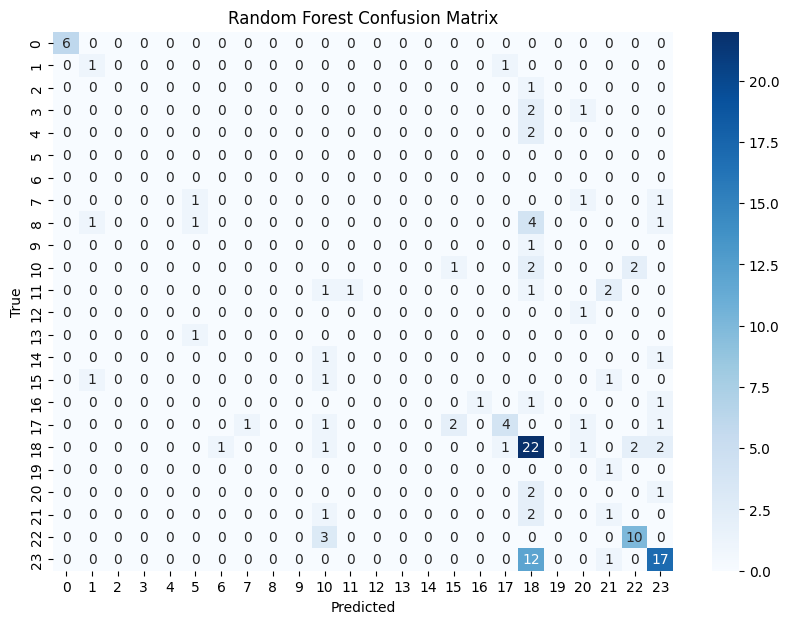

In [11]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 6. Light GBM Classifier

In [12]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_predictions = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
print(f"LGBM Accuracy: {lgbm_accuracy}")
print("LGBM Classification Report:")
print(classification_report(y_test, lgbm_predictions))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 18
[LightGBM] [Info] Start training from score -3.120895
[LightGBM] [Info] Start training from score -4.219508
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -4.219508
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -3.613372
[LightGBM] [Info] Start traini

#### 6.1 Confusion Matrix for Light GBM

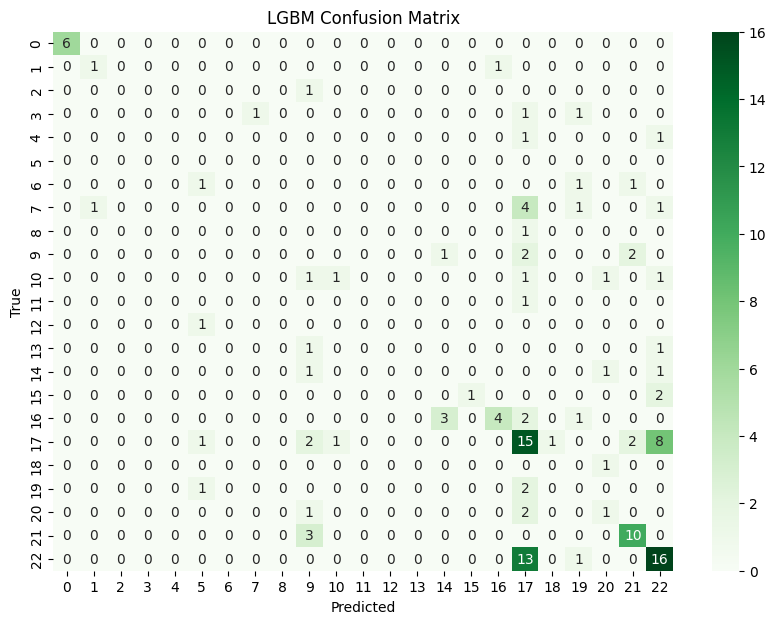

In [13]:
# Confusion Matrix for LGBM
lgbm_cm = confusion_matrix(y_test, lgbm_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(lgbm_cm, annot=True, fmt='d', cmap='Greens')
plt.title('LGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Comparison of Classifiers
Random Forest Accuracy: 0.4632352941176471
LGBM Accuracy: 0.40441176470588236


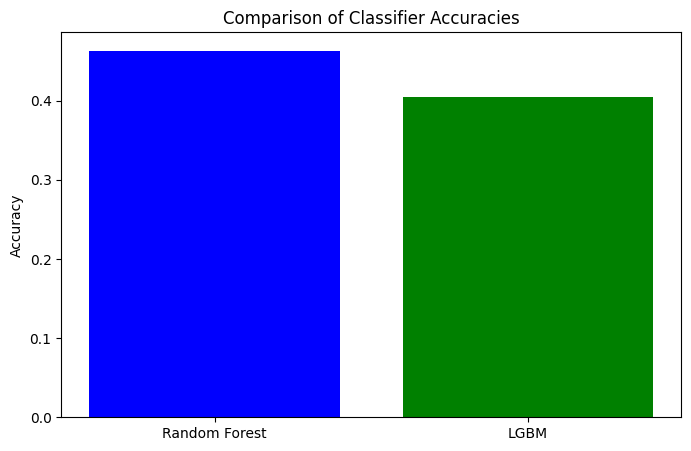

In [14]:
print("Comparison of Classifiers")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"LGBM Accuracy: {lgbm_accuracy}")

# Plotting accuracies for comparison
accuracies = {'Random Forest': rf_accuracy, 'LGBM': lgbm_accuracy}
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.show()


## 7. Hyperparameter Tuning 

#### 7.1 Hyperparameter Tuning using GridSearchCV for RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Model: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)


In [16]:
# Retrieve the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.47058823529411764
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       1.00      0.20      0.33         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         3
          22       0.83     

#### 7.2 Hyperparameter Tuning using RandomizedSearchCV for LGBMClassifier

In [18]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
lgbm = LGBMClassifier(random_state=42)

# Define the hyperparameters and their values
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}

# Set up the random search
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params1 = random_search.best_params_
best_model1 = random_search.best_estimator_

print("Best Hyperparameters:", best_params1)
print("Best Model:", best_model1)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 18
[LightGBM] [Info] Start training from score -3.120895
[LightGBM] [Info] Start training from score -4.219508
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Start training from score -3.931826
[LightGBM] [Info] Start training from score -4.219508
[LightGBM] [Info] Start training from score -6.011267
[LightGBM] [Info] Sta

In [19]:
# Retrieve the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model1.predict(X_test)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.4338235294117647
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         5
          14       0.50      0.20      0.29         5
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          21       1.00      0.33      0.50         3
          22       0.80      